## Q.1- Create the following data and write to a csv file: Generate 10 random points in each of the the following circles (i) centre at (3,3) and radius 2, (ii) centre at (7,7) and radius 2 (iii) centre at (11,11) and radius 2.  Plot the data as well.                     (2 marks)



In [1]:
import csv
import random
import math

# To generate random points within a circle with radius = R and center = (h, k)
def generate_random_points(center, R, num_points):
    points = []
    (h, k) = center
    for _ in range(num_points):
        r = random.uniform(0, R)
        theta = random.uniform(0, 2 * math.pi)
        x = h + r * math.cos(theta)
        y = k + r * math.sin(theta)
        points.append((x, y))
    return points

# 10 random points in the circles with C1 = (3, 3), R1= 2, C2 = (7, 7), R2= 2, and C3 = (11, 11), R3= 2
points_of_C1 = generate_random_points((3, 3), 2, 10)
points_of_C2 = generate_random_points((7, 7), 2, 10)
points_of_C3 = generate_random_points((11, 11), 2, 10)

# Write points to a CSV file
with open('random_points.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['x', 'y'])  # Writing header
    for circle_pts in [points_of_C1, points_of_C2, points_of_C3]:
        for point in circle_pts:
            writer.writerow(point)

print("CSV file has been created with random points.")


CSV file has been created with random points.


In [2]:
import pandas as pd
df = pd.read_csv('random_points.csv')

In [3]:
df

,x,y
0,2.665548,2.659011
1,3.506538,3.504271
2,3.008043,2.987730
3,2.722666,3.259440
4,2.826145,4.036826
5,1.819109,3.968543
6,2.866792,2.795249
7,1.334617,3.344493
8,3.131757,2.464229
9,3.356968,1.948612


In [4]:
# Read points from the CSV file

def read_points_from_csv(file_name):
    points = []
    with open(file_name, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header
        for row in reader:
            points.append((float(row[0]), float(row[1])))
    return points

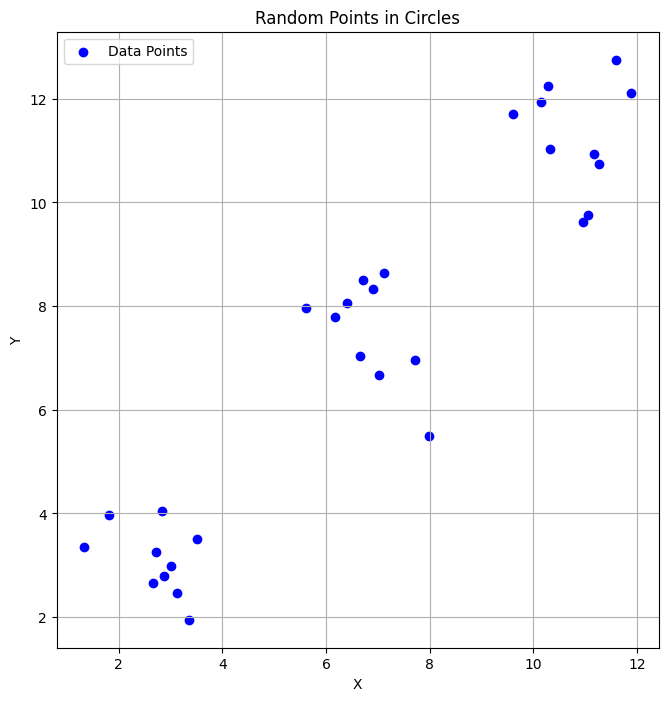

In [5]:
import matplotlib.pyplot as plt

# Plot the data
def plot_points(points, color, label):
    plt.scatter([point[0] for point in points], [point[1] for point in points], color=color, label=label)

# Read points from CSV file
all_pts = read_points_from_csv('random_points.csv')

plt.figure(figsize=(8, 8))
plot_points(all_pts, color='blue', label='Data Points')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Points in Circles')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')  # Ensure equal aspect ratio
plt.legend()

plt.show()


## Q.2- Implement K - means clustering algorithm and for the above data, show the change in the centroid as well as the class assignments. Also, plot the cost function for K varying from 1 to 5. Show that the value of K matches with the intuition from the data. Plot the K-classes for the final K-value.      (8 marks)

In [6]:
import numpy as np

K = 2
n = len(all_pts)  # Number of data points

x_min, x_max = min(point[0] for point in all_pts), max(point[0] for point in all_pts)
y_min, y_max = min(point[1] for point in all_pts), max(point[1] for point in all_pts)

# Generate random centroids within the range of the data
centroids = np.random.uniform(low=[x_min, y_min], high=[x_max, y_max], size=(2, K))

print("Initial centroids:")
print(centroids)

Initial centroids:
[[ 5.18187993  5.41071322]
 [ 7.16447275 11.26466577]]


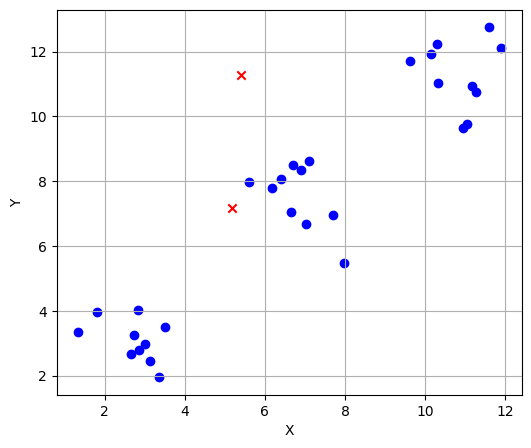

In [7]:
# Plotting
plt.figure(figsize=(6, 5))

plt.scatter([point[0] for point in all_pts], [point[1] for point in all_pts], color='blue', label='Circle 1')

# Plot centroids
plt.scatter(centroids[0], centroids[1], color='red', marker='x', label='Centroids')

plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Euclidean distance
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Assign points to centroids based on minimum distance
def assign_points_to_centroids(points, centroids):
    assignments = []
    total_distance = 0
    for point in points:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        min_distance = min(distances)
        total_distance += min_distance
        assignments.append((np.argmin(distances), min_distance))
    return assignments, total_distance

# Calculate new centroids based on group assignments
def calculate_new_centroids(points, assignments, K, centroids):
    new_centroids = []
    for k in range(K):
        cluster_points = [points[i] for i, assignment in enumerate(assignments) if assignment[0] == k]
        if cluster_points:
            new_centroids.append(np.mean(cluster_points, axis=0))
        else:
            new_centroids.append(centroids[k])
    return np.array(new_centroids)
    

In [80]:
    
# K-means algorithm
def k_means(points, K, max_iterations=100, tolerance=1e-4):
    # Randomly initialize centroids
    centroids = np.random.uniform(low=np.min(points, axis=0), high=np.max(points, axis=0), size=(K, points.shape[1]))
    
    # Initialize variables for convergence
    iteration = 0
    cost_history = []
    centroids_history = []
    assignments_history = []
    
    while iteration < max_iterations:
        iteration += 1
        
        # Assign points to centroids based on minimum distance
        assignments, cost = assign_points_to_centroids(points, centroids)
        cost_history.append(cost)
        centroids_history.append(centroids)
        assignments_history.append(assignments)
        
        # Calculate new centroids based on group assignments
        new_centroids = calculate_new_centroids(points, assignments, K, centroids)
        
        # Check for convergence
        if np.allclose(centroids, new_centroids, atol=tolerance):
            break
        
        # Update centroids
        centroids = new_centroids
    
    return centroids, assignments, cost_history, centroids_history, assignments_history

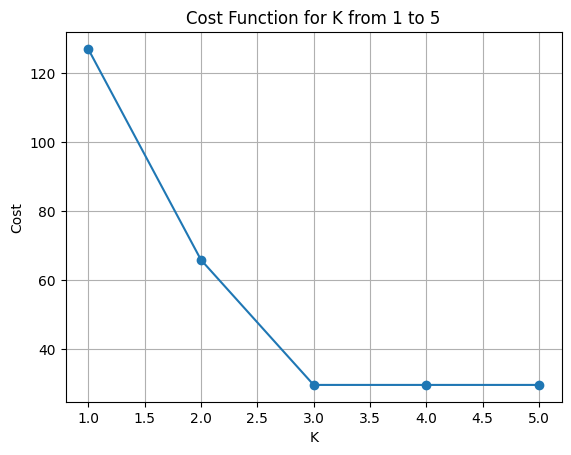

In [111]:
# all points of the circles
all_pts = np.array(points_of_C1 + points_of_C2 + points_of_C3)

# Plotting cost function for K varying from 1 to 5
K_values = range(1, 6)
costs = []

for K in K_values:
    _, _, cost_history, _, _ = k_means(all_pts, K)
    costs.append(cost_history[-1])

plt.plot(K_values, costs, marker='o')
plt.xlabel('K')
plt.ylabel('Cost')
plt.title('Cost Function for K from 1 to 5')
plt.grid(True)
plt.show()

3


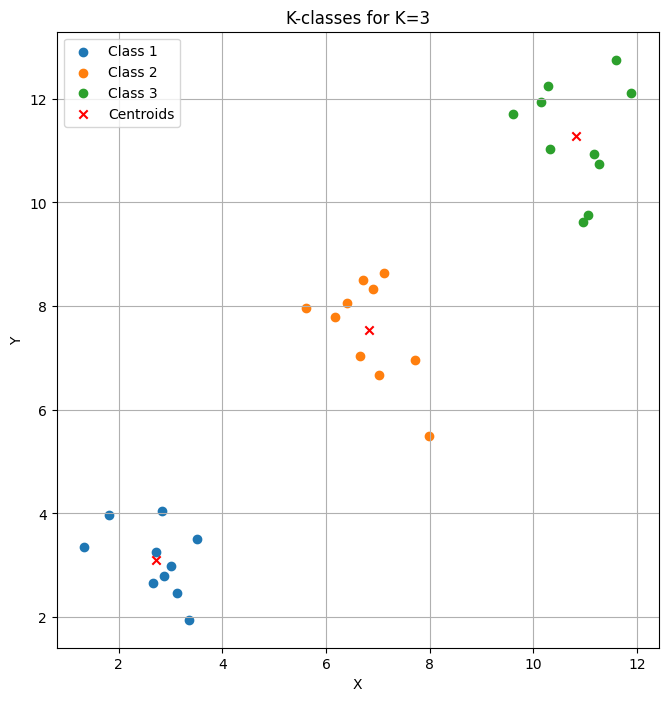

In [112]:
# Run k-means with final K value
final_K = K_values[np.argmin(costs)]
print(final_K)
centroids, assignments, _, centroids_history, assignments_history = k_means(all_pts, final_K)

# Plot K-classes for the final K value
plt.figure(figsize=(8, 8))
for k in range(final_K):
    cluster_points = np.array([all_pts[i] for i, assignment in enumerate(assignments) if assignment[0] == k])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Class {k+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', label='Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'K-classes for K={final_K}')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()


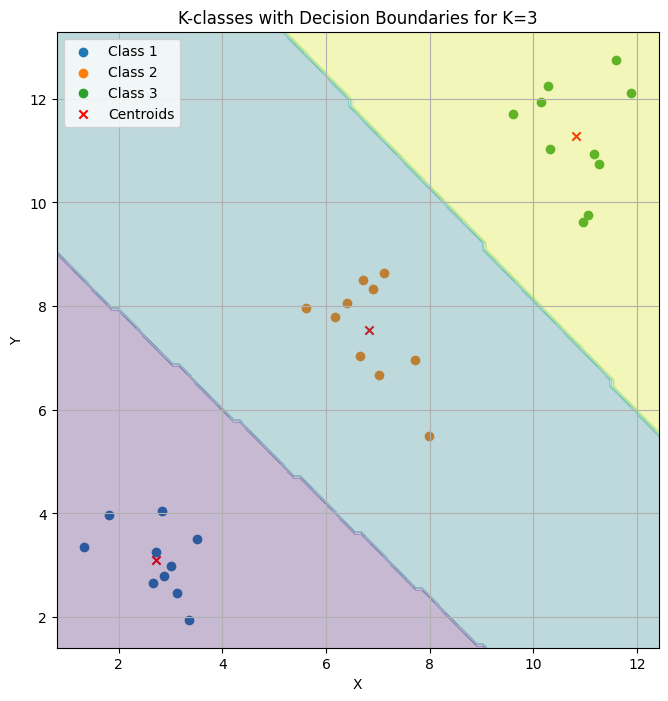

In [113]:
def plot_decision_boundary(centroids, assignments, xlim, ylim):
    # Generate grid points
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Assign grid points to centroids
    grid_assignments, _ = assign_points_to_centroids(grid_points, centroids)

    # Reshape grid assignments to match the grid shape
    grid_assignments = np.array(grid_assignments)[:, 0].reshape(xx.shape)

    # Plot decision boundaries
    plt.contourf(xx, yy, grid_assignments, alpha=0.3)

# Plot K-classes for the final K value with decision boundaries
plt.figure(figsize=(8, 8))
for k in range(final_K):
    cluster_points = np.array([all_pts[i] for i, assignment in enumerate(assignments) if assignment[0] == k])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Class {k+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', label='Centroids')
plot_decision_boundary(centroids, assignments, plt.xlim(), plt.ylim())
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'K-classes with Decision Boundaries for K={final_K}')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()
